In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from model import regression
from sklearn.model_selection import train_test_split
from data_loader import load_house_attributes
from data_sources import source_choice
from processing_attributes import process_house_attributes

In [26]:
df = source_choice()

In [27]:
df_paris = load_house_attributes(df)

In [28]:
df_paris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169852 entries, 0 to 313774
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   No disposition             169852 non-null  int32         
 1   Date mutation              169852 non-null  datetime64[ns]
 2   Nature mutation            169852 non-null  object        
 3   Valeur fonciere            169852 non-null  float64       
 4   Type de voie               169852 non-null  object        
 5   Code postal                169852 non-null  float64       
 6   Commune                    169852 non-null  object        
 7   Code departement           169852 non-null  object        
 8   Code commune               169852 non-null  int32         
 9   Section                    169852 non-null  object        
 10  Nombre de lots             169852 non-null  int32         
 11  Type local                 169852 non-null  object       

In [29]:
df_paris.describe()

,No disposition,Valeur fonciere,Code postal,Code commune,Nombre de lots,Surface reelle bati,Nombre pieces principales,year,months,day,Prix au m²
count,169852.000000,1.698520e+05,169852.000000,169852.000000,169852.000000,169852.000000,169852.000000,169852.000000,169852.000000,169852.000000,169852.000000
mean,1.007501,5.464244e+05,75013.450145,113.450145,1.677937,53.775510,2.406348,2017.950357,6.656872,16.646616,9986.923786
std,0.192903,5.367971e+05,4.799017,4.799017,0.827844,41.059145,1.305421,1.370735,3.395307,8.895145,3413.303980
min,1.000000,8.000000e+03,75001.000000,101.000000,0.000000,2.000000,0.000000,2016.000000,1.000000,1.000000,1500.000000
25%,1.000000,2.500000e+05,75011.000000,111.000000,1.000000,28.000000,1.000000,2017.000000,4.000000,9.000000,7940.000000
50%,1.000000,3.980000e+05,75015.000000,115.000000,2.000000,43.000000,2.000000,2018.000000,7.000000,17.000000,9558.823529
75%,1.000000,6.500000e+05,75017.000000,117.000000,2.000000,67.000000,3.000000,2019.000000,10.000000,25.000000,11474.358974
max,24.000000,2.850000e+07,75020.000000,120.000000,27.000000,1500.000000,23.000000,2020.000000,12.000000,31.000000,25000.000000


<Figure size 720x720 with 0 Axes>

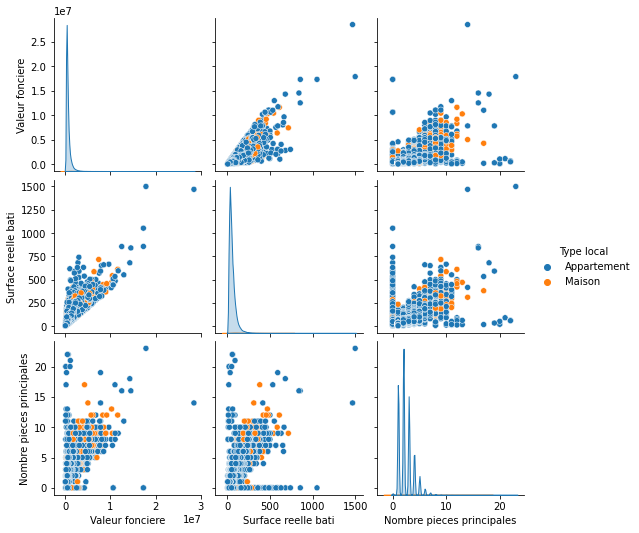

In [30]:
plt.figure(figsize=(10, 10))
sns.pairplot(df_paris[['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'Type local']],
             hue='Type local')

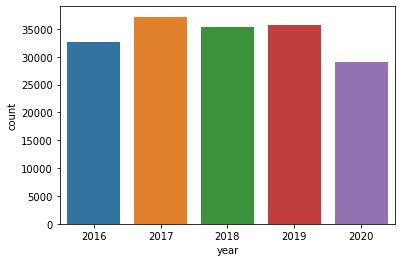

In [31]:
sns.countplot(x="year", data=df_paris)

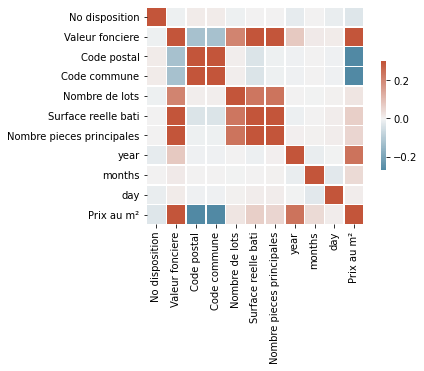

In [32]:
corr = df_paris.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
train, test = train_test_split(df_paris, test_size=0.25, random_state=42)

In [34]:
print('Training Shape:', train.shape)
print('Testing Shape:', test.shape)

Training Shape: (127389, 18)
Testing Shape: (42463, 18)


In [35]:
train_x, test_x = process_house_attributes(df_paris, train, test)

In [36]:
train_y = train["Valeur fonciere"]
test_y = test["Valeur fonciere"]

In [37]:
regr = regression(train_x, train_y)

months 2.3
day 0.0
No disposition 0.1
Nombre de lots 0.1
Surface reelle bati 0.0
Nombre pieces principales 0.1
Commune 96.9
Type local 0.4


In [40]:
"""Le critères le plus important pour prédire la valeur d'un bien à Paris est l'arrondissement, la saisonnalité ou le type de bien n'influencent pas le modèle"""

"Le critères le plus important pour prédire la valeur d'un bien à Paris est l'arrondissement, la saisonnalité ou le type de bien n'influencent pas le modèle"

In [39]:
prediction_regr = regr.predict(test_x)
errors_regr = abs(prediction_regr - test_y)
print('Mean Absolute Error regr:', round(np.mean(errors_regr), 2), 'euros.')

Mean Absolute Error regr: 126821.85 euros.


In [41]:
'''Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées'''

"Notre model n'est pas performant car il n'y a pas assez de données et certaines données n'ont pas pu être correctement exploitées"